In [3]:

import math, scipy, pylab
import glob, os
import matplotlib.pyplot as plt
import re, operator
import time
from lmfit.models import StepModel, Model
from tqdm import tqdm
import numpy as np
from numpy import loadtxt
import pandas as pd
import datetime

# Functions

In [4]:

def generate_data(df):  # generate dataframes from csv file
    return df["Dia Ano"], df["Suspeitos"], df["Confirmados"]


In [5]:
def fitlogistic(x, y):  # fit a logistic function
    model = StepModel(form="logistic")
    # parameters to fit guesses by lmfit
    parameters = model.guess(y, x=x)
    output = model.fit(y, parameters, x=x)
    amplitude = output.params["amplitude"].value
    amplitude = math.floor(amplitude)
    center = output.params["center"].value
    return amplitude, center, output.best_fit, output.fit_report()

In [6]:

def fiterf(x, y):  # fit a error function
    model = StepModel(form="erf")
    # parameters to fit guesses by lmfit
    parameters = model.guess(y, x=x)
    output = model.fit(y, parameters, x=x)
    amplitude = output.params["amplitude"].value
    amplitude = math.floor(amplitude)
    center = output.params["center"].value
    return amplitude, center, output.best_fit, output.fit_report()


In [7]:
def convertdateconf(centerc):  # convert date for confirmed cases
    diac = centerc - 70 + centerc
    diamaxc = datetime.datetime(2020, 1, 1) + datetime.timedelta(diac - 1)
    return diac, diamaxc


In [8]:
def convertdatesusp(centers):  # convert date for suspected cases
    dias = centers - 63 + centers
    diamaxs = datetime.datetime(2020, 1, 1) + datetime.timedelta(dias - 1)
    return dias, diamaxs


In [9]:
def predict16(
    ampsusp, ampconf, diaconf, diasusp
):  # make a prediction from 1/3 of the difference of cases
    a = ampsusp - ampconf
    b = a / 6
    pred = ampconf + b
    pred = math.floor(pred)
    aa = diasusp - diaconf
    bb = aa / 6
    predia = diaconf + bb
    diapre = datetime.datetime(2020, 1, 1) + datetime.timedelta(predia - 1)
    return diapre, pred


In [10]:
def plot(  # plot all the data
    x,
    yconfirmados,
    outputconf,
    ysuspeitos,
    outputsusp,
    Diamaxconf,
    amplitudeconf,
    Diamaxpre,
    pred,
):
    fig = plt.figure()
    fig.suptitle("Casos de COVID-19 em portugal", fontsize=14, fontweight="bold")
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)

    ax.set_xlabel("Dia do ano")
    ax.set_ylabel("Casos")
    ax.text(
        60.2,
        11000,
        r"Pelo fit dos dados o numero máximo de infectados "
        + "\n"
        + "será atingido no dia "
        + str(Diamaxconf.strftime("%d/%m/%Y"))
        + " em que se esperam "
        + "\n"
        + str(amplitudeconf)
        + " casos.",
        fontsize=10,
    )

    ax.text(
        60.2,
        7000,
        r"Fazendo uma previsão (adicionando 1/6 da diferença"
        + "\n"
        + "entre os suspeitos e confirmados) com base nos dados"
        + "\n"
        + "o numero máximo de infectados será atingido no dia "
        + "\n"
        + str(Diamaxpre.strftime("%d/%m/%Y"))
        + " em que se esperam "
        + str(pred)
        + " casos.",
        fontsize=10,
    )

    ax.plot(x, yconfirmados, "ro", label="Casos confirmados")
    ax.plot(x, outputconf, label="Fit casos confirmados")
    ax.plot(x, ysuspeitos, "bo", label="Casos suspeitos")
    ax.plot(x, outputsusp, label="Fit casos suspeitos")
    ax.legend(loc="center left", bbox_to_anchor=(0.02, 0.3))
    plt.show()


In [11]:
def predictions(df):  # make everything
    x, ysuspeitos, yconfirmados = generate_data(df)
    amplitudeconf, centerconf, outputconf, outputconfreport = fitlogistic(
        x, yconfirmados
    )
    amplitudesusp, centersusp, outputsusp, outputsuspreport = fitlogistic(x, ysuspeitos)
    Diaconf, Diamaxconf = convertdateconf(centerconf)
    Diasusp, Diamaxsusp = convertdatesusp(centersusp)
    Diamaxpre, pred = predict16(amplitudesusp, amplitudeconf, Diaconf, Diasusp)
    plot(
        x,
        yconfirmados,
        outputconf,
        ysuspeitos,
        outputsusp,
        Diamaxconf,
        amplitudeconf,
        Diamaxpre,
        pred,
    )



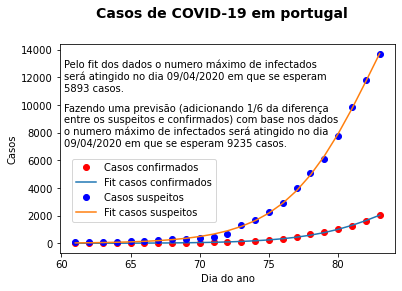

In [12]:
# Running
if __name__ == "__main__":
    df = pd.read_excel(r"D:\PC\Desktop\Corona\coronadata.xlsx")
    predictions(df)

